3. Write your own function to equalize the histogram of an image. Apply this function to the
runway image.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def custom_hist_equalization(img):
       
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])    
    cdf = hist.cumsum()    
    cdf_m = np.ma.masked_equal(cdf, 0)        
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())       
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')    
    img_equalized = cdf[img]

    return img_equalized

--- Main Execution ---

In [10]:
filename = 'runway.png' 
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

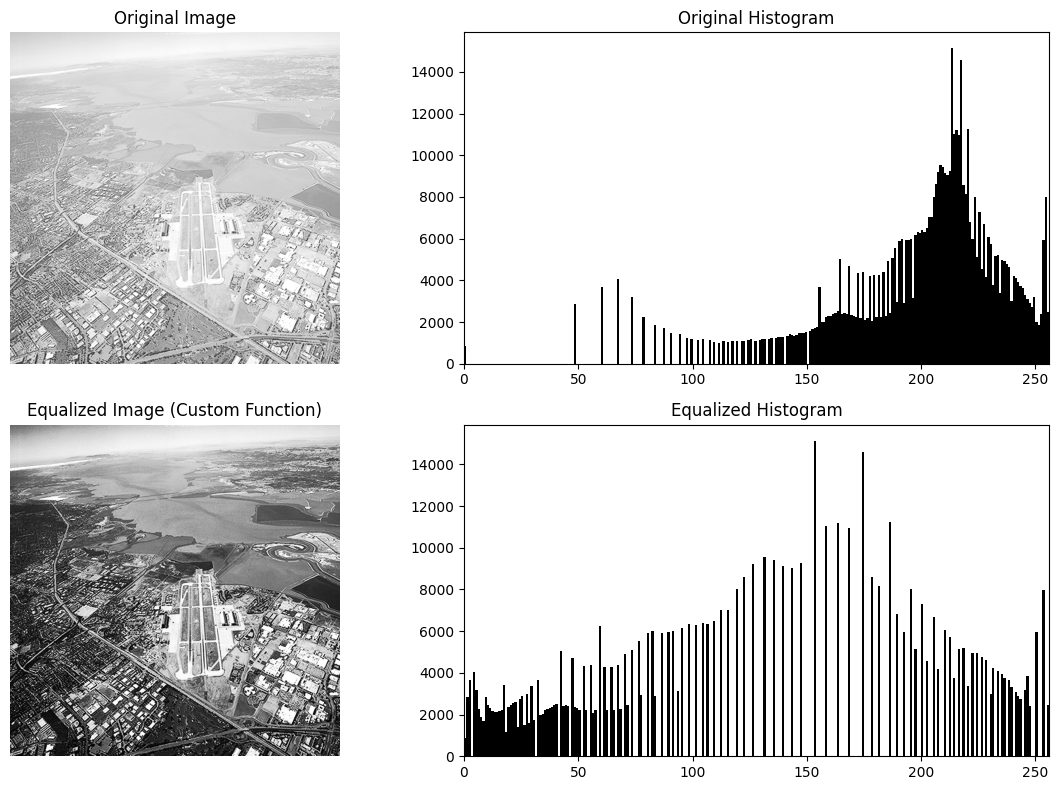

In [11]:
if image is None:
    print("Error: Image not found.")
else:    
    equalized_image = custom_hist_equalization(image)  

    # --- Visualization ---
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Original Histogram
    plt.subplot(2, 2, 2)
    plt.hist(image.flatten(), 256, [0, 256], color='black')
    plt.title('Original Histogram')
    plt.xlim([0, 256])

    # Equalized Image
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image (Custom Function)')
    plt.axis('off')

    # Equalized Histogram
    plt.subplot(2, 2, 4)
    plt.hist(equalized_image.flatten(), 256, [0, 256], color='black')
    plt.title('Equalized Histogram')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()